# Problem Statement -
Which type of shows to produce and
how to grow the business?

## Creating initial dataframe

In [7]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: C:\Users\Admin\netflix.csv

  0%|          | 0.00/3.40M [00:00<?, ?B/s]
 31%|###       | 1.05M/3.40M [00:00<00:00, 8.08MB/s]
 62%|######1   | 2.10M/3.40M [00:00<00:00, 8.08MB/s]
 93%|#########2| 3.15M/3.40M [00:00<00:00, 8.40MB/s]
100%|##########| 3.40M/3.40M [00:00<00:00, 8.75MB/s]


In [8]:
import pandas as pd
df = pd.read_csv('netflix.csv')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Analysing basic metrics-

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We can see the different columns, number of values in each column and their datatypes.
1. There are some null values in the dataframe, in columns director, cast etc.
2. There are twelve columns and the total number of entries is 8807. 
3. There is only one column with numerical data, 'release_year'.
4. The date_added column is object data type. We'll convert it to datetime.
5. Columns 'type' and 'rating' are categorical. So, we'll convert them to category data type.
######  
Note - The duration column contains some numerical information too. We'll separate the required information when needed.

In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df['date_added'] = df['date_added'].astype('datetime64')

In [13]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 706.2+ KB


#### Statistical summary of the integer column (release_year) -

In [15]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


1. The mean release_year is 2014.2 .
2. The range of values in this column is - (1925, 2021)
3. Median release_year is 2017

# Non-Graphical Analysis

In [16]:
unique_types = df['type'].value_counts().reset_index()
unique_types.columns = ['type', 'count']
unique_types

,type,count
0,Movie,6131
1,TV Show,2676


There are only two unique entries in the column 'type'.

In [17]:
unique_ratings = df['rating'].value_counts().reset_index()
unique_ratings.columns = ['rating', 'count']
unique_ratings

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


There are 17 unique entries in the column 'rating'.

In [18]:
df['show_id'].is_unique

True

The column 'show_id' uniquely identifies each entry.

To analyse the columns cast, director, country and listed_in, we will unnest the dataframe.

## Creating unnested dataframe

Separating cast

In [19]:
cast_df = df[['show_id', 'cast']]
cast_df.head()

,show_id,cast
0,s1,NaN
1,s2,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,s3,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,s4,NaN
4,s5,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [20]:
cast_df.loc[:,'cast'] = cast_df.loc[:,'cast'].astype('str')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
cast_df.loc[:,'cast'] = cast_df.loc[:,'cast'].apply(lambda x: x.split(','))

In [22]:
temp = pd.DataFrame(cast_df.loc[:,'cast'].to_list())
temp

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
3,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
8803,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8804,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
cast_df = pd.concat([cast_df['show_id'], temp], axis = 1)

In [24]:
cast_df.shape

(8807, 51)

In [25]:
cast_df = cast_df.melt(id_vars = ['show_id'], value_name = 'cast')

In [26]:
cast_df.drop(['variable'],axis=1, inplace = True)


In [27]:
# cast_df.loc[cast_df['show_id'] == 's2',:]

In [28]:
cast_df.dropna(how = 'any', inplace = True)

In [29]:
cast_df.loc[cast_df['show_id']=='s3',:]

,show_id,cast
2,s3,Sami Bouajila
8809,s3,Tracy Gotoas
17616,s3,Samuel Jouy
26423,s3,Nabiha Akkari
35230,s3,Sofia Lesaffre
44037,s3,Salim Kechiouche
52844,s3,Noureddine Farihi
61651,s3,Geert Van Rampelberg
70458,s3,Bakary Diombera


Separating directors

In [30]:
dir_df = df[['show_id', 'director']]

In [31]:
dir_df.loc[:,'director'] = dir_df[['director']].astype('str')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [32]:
dir_df.loc[:,'director'] = dir_df.loc[:,'director'].apply(lambda x: x.split(','))

In [33]:
dir_df

,show_id,director
0,s1,[Kirsten Johnson]
1,s2,[nan]
2,s3,[Julien Leclercq]
3,s4,[nan]
4,s5,[nan]
...,...,...
8802,s8803,[David Fincher]
8803,s8804,[nan]
8804,s8805,[Ruben Fleischer]
8805,s8806,[Peter Hewitt]


In [34]:
temp = pd.DataFrame(dir_df['director'].to_list())
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
1,nan,None,None,None,None,None,None,None,None,None,None,None,None
2,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
3,nan,None,None,None,None,None,None,None,None,None,None,None,None
4,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
8803,nan,None,None,None,None,None,None,None,None,None,None,None,None
8804,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None
8805,Peter Hewitt,None,None,None,None,None,None,None,None,None,None,None,None


In [35]:
dir_df = pd.concat([dir_df['show_id'], temp], axis=1)

In [36]:
dir_df = dir_df.melt(id_vars=['show_id'], value_name = 'director')


In [37]:
dir_df.drop(['variable'],axis=1, inplace=True)
dir_df

,show_id,director
0,s1,Kirsten Johnson
1,s2,nan
2,s3,Julien Leclercq
3,s4,nan
4,s5,nan
...,...,...
114486,s8803,None
114487,s8804,None
114488,s8805,None
114489,s8806,None


In [38]:
dir_df.dropna(axis=0, how='any', inplace=True)

In [39]:
dir_df.loc[dir_df['show_id']=='s5888', :]

,show_id,director
5887,s5888,Chris Buck
14694,s5888,Jennifer Lee
23501,s5888,Patrick Osborne
32308,s5888,Lauren MacMullan
41115,s5888,John Kahrs
49922,s5888,Nathan Greno
58729,s5888,Byron Howard
67536,s5888,Stevie Wermers
76343,s5888,Dean Wellins
85150,s5888,Kevin Deters


Separating country

In [40]:
country_df = df[['show_id', 'country']]
country_df

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,NaN
3,s4,NaN
4,s5,India
...,...,...
8802,s8803,United States
8803,s8804,NaN
8804,s8805,United States
8805,s8806,United States


In [41]:
country_df.loc[:,'country'] = country_df['country'].astype('str')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [42]:
country_df.loc[:,'country'] = country_df.loc[:,'country'].apply(lambda x: x.split(','))

In [43]:
temp = pd.DataFrame(country_df['country'].to_list())

In [44]:
country_df = pd.concat([country_df['show_id'], temp], axis=1)
country_df

,show_id,0,1,2,3,4,5,6,7,8,9,10,11
0,s1,United States,None,None,None,None,None,None,None,None,None,None,None
1,s2,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,s3,nan,None,None,None,None,None,None,None,None,None,None,None
3,s4,nan,None,None,None,None,None,None,None,None,None,None,None
4,s5,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,United States,None,None,None,None,None,None,None,None,None,None,None
8803,s8804,nan,None,None,None,None,None,None,None,None,None,None,None
8804,s8805,United States,None,None,None,None,None,None,None,None,None,None,None
8805,s8806,United States,None,None,None,None,None,None,None,None,None,None,None


In [45]:
country_df = country_df.melt(id_vars = ['show_id'], value_name = 'country')
country_df

,show_id,variable,country
0,s1,0,United States
1,s2,0,South Africa
2,s3,0,nan
3,s4,0,nan
4,s5,0,India
...,...,...,...
105679,s8803,11,None
105680,s8804,11,None
105681,s8805,11,None
105682,s8806,11,None


In [46]:
country_df.drop(['variable'], axis = 1, inplace=True)
country_df.dropna(how='any', inplace=True)

In [47]:
country_df.dropna(axis = 0, how = 'any', inplace=True)
country_df

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,nan
3,s4,nan
4,s5,India
...,...,...
78859,s8404,Germany
85496,s6234,Sweden
87666,s8404,Netherlands
94303,s6234,United States


In [48]:
# Check why some nan values didn't drop.

Separating listed_in

In [49]:
listed_in_df = df[['show_id', 'listed_in']]
listed_in_df.head()

,show_id,listed_in
0,s1,Documentaries
1,s2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,"Docuseries, Reality TV"
4,s5,"International TV Shows, Romantic TV Shows, TV ..."


In [50]:
listed_in_df.loc[:,'listed_in'] = listed_in_df.loc[:,'listed_in'].astype('str')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [51]:
listed_in_df.loc[:,'listed_in'] = listed_in_df.loc[:,'listed_in'].apply(lambda x: x.split(','))

In [52]:
temp = pd.DataFrame(listed_in_df.loc[:,'listed_in'].to_list())

In [53]:
listed_in_df = pd.concat([listed_in_df.loc[:,'show_id'], temp], axis=1)

In [54]:
listed_in_df = listed_in_df.melt(id_vars = ['show_id'], value_name = 'listed_in')

In [55]:
listed_in_df.drop(['variable'],axis=1, inplace=True)


In [56]:
listed_in_df.dropna(how='any', axis=0, inplace = True)
listed_in_df

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s3,Crime TV Shows
3,s4,Docuseries
4,s5,International TV Shows
...,...,...
26414,s8801,TV Dramas
26415,s8802,Thrillers
26416,s8803,Thrillers
26417,s8804,TV Comedies


In [57]:
listed_in_df['listed_in'] = listed_in_df['listed_in'].apply(lambda x: x.strip())

Merging to get consolidated dataframe

In [58]:
df_consolidated = cast_df.merge(dir_df, on='show_id', how='outer')

In [59]:
df_consolidated = df_consolidated.merge(country_df, on = 'show_id', how='outer')

In [60]:
df_consolidated = df_consolidated.merge(listed_in_df, on = 'show_id', how='outer')

In [61]:
df_consolidated = df_consolidated.merge(df.drop(['cast','director','listed_in','country'], axis=1), on = 'show_id', how='outer')

In [62]:
df_consolidated.head()

,show_id,cast,director,country,listed_in,type,title,date_added,release_year,rating,duration,description
0,s1,nan,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,Ama Qamata,nan,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s2,Ama Qamata,nan,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,s2,Ama Qamata,nan,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,s2,Khosi Ngema,nan,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


The consolidated dataframe is ready.

In [63]:
df_consolidated.isna().sum()

show_id           0
cast              0
director          0
country           0
listed_in         0
type              0
title             0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In [64]:
df_consolidated['director'].nunique()

5121

So, there are total 5121 unique directors in our data.

In [65]:
df_consolidated['cast'].nunique()

39297

And 39,297 unique actors.

In [66]:
df_consolidated['country'].nunique()

198

And 198 countries

In [67]:
df_consolidated['listed_in'].nunique()

42

And forty two categories.

In [68]:
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   cast          202065 non-null  object        
 2   director      202065 non-null  object        
 3   country       202065 non-null  object        
 4   listed_in     202065 non-null  object        
 5   type          202065 non-null  category      
 6   title         202065 non-null  object        
 7   date_added    201907 non-null  datetime64[ns]
 8   release_year  202065 non-null  int64         
 9   rating        201998 non-null  category      
 10  duration      202062 non-null  object        
 11  description   202065 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(1), object(8)
memory usage: 17.3+ MB


# Visual Analysis

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting some straightforward plots using our initial/unconsolidated dataframe-

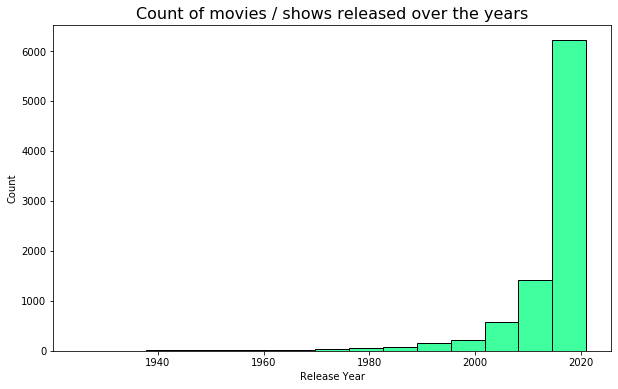

In [70]:
plt.figure(figsize=(10,6))
sns.histplot(data = df['release_year'], bins = 15, color='springgreen')
plt.xlabel('Release Year')
plt.title('Count of movies / shows released over the years', fontsize=16)
plt.show()

We see that most of the movies on Netflix were released after 1980. Also, the number of movies/shows on Netflix that were released in the years 2017-2020 is very high compared to other years.

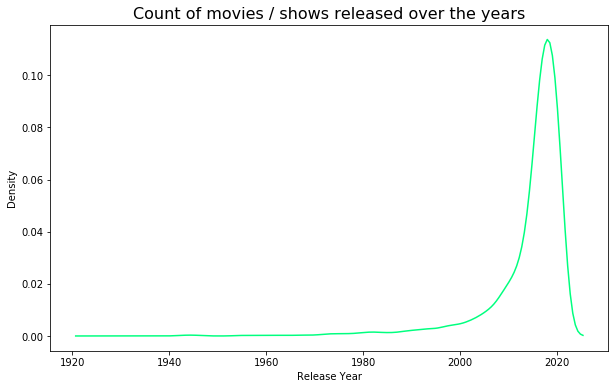

In [71]:
plt.figure(figsize=(10,6))
sns.kdeplot(data = df['release_year'], color='springgreen')
plt.xlabel('Release Year')
plt.title('Count of movies / shows released over the years', fontsize=16)
plt.show()

The probablity that a show / movie was released around the year 2017 is very high (more than ten percent).

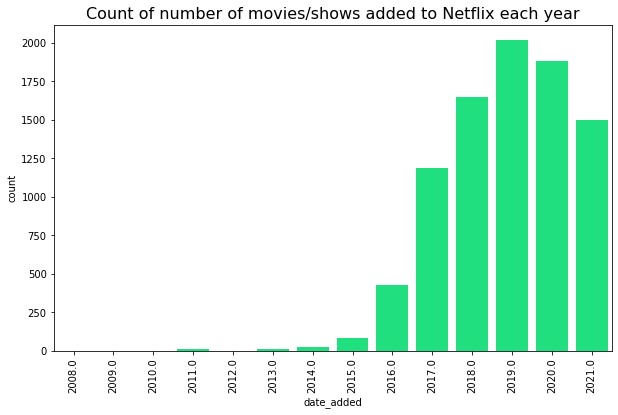

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['date_added'].dt.year, color='springgreen')
plt.xticks(rotation=90)
plt.title('Count of number of movies/shows added to Netflix each year',fontsize=16)
plt.show()

There was a large increase in the number of movies/shows added each year during the years 2015-2019.

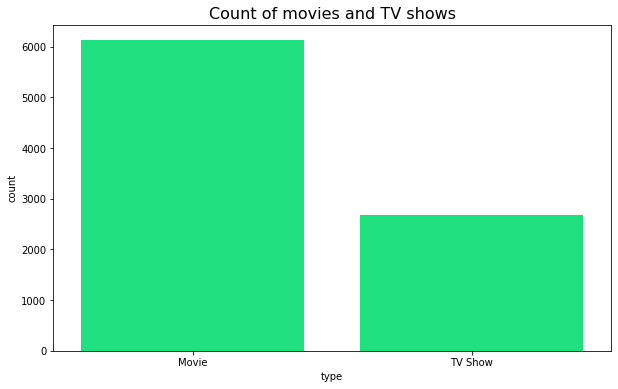

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='type', color = 'springgreen')
plt.title('Count of movies and TV shows',fontsize=16)
plt.show()

The platform offers about 6000 movies and 2500 TV Shows.

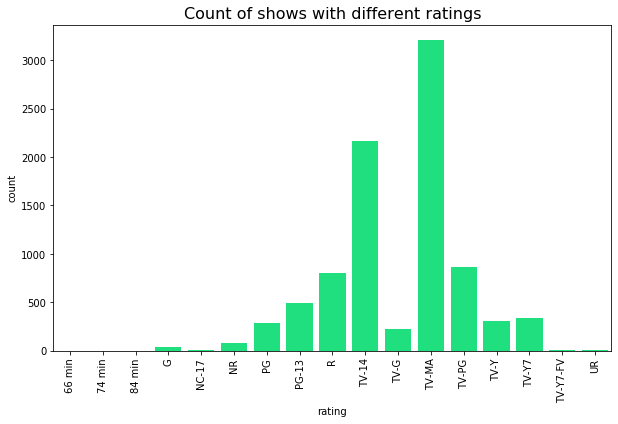

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='rating', color = 'springgreen')
plt.xticks(rotation=90)
plt.title('Count of shows with different ratings',fontsize=16)
plt.show()

Shows rated TV-MA (mature audiences) are maximum in number, followed by TV-14 (for age > 14).

In [75]:
# Here on, we work with our consolidated dataframe to analyse the attributes like director, cast etc.

# First, for the listed_in attribute -

df_consolidated.loc[:,['show_id', 'listed_in']]

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s2,International TV Shows
...,...,...
202060,s8807,International Movies
202061,s8807,Music & Musicals
202062,s8807,Dramas
202063,s8807,International Movies


In [76]:
temp = df_consolidated.loc[:,['show_id', 'listed_in']].groupby(['show_id', 'listed_in']).groups.keys()
temp = list(map(lambda x: list(x), temp))
unique_sh_li = pd.DataFrame(temp, columns = ['show_id', 'category'])
unique_sh_li.head(10)

,show_id,category
0,s1,Documentaries
1,s10,Comedies
2,s10,Dramas
3,s100,TV Comedies
4,s100,TV Dramas
5,s1000,Dramas
6,s1000,International Movies
7,s1000,Thrillers
8,s1001,Action & Adventure
9,s1001,International Movies


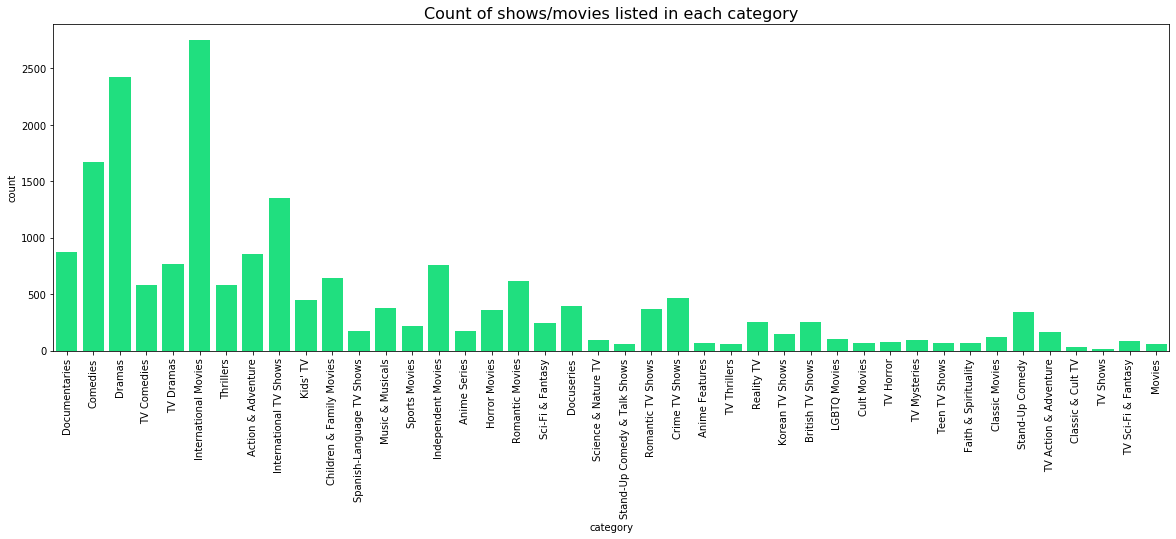

In [77]:
plt.figure(figsize=(20,6))
sns.countplot(x = unique_sh_li['category'], color = 'springgreen')
plt.xticks(rotation=90)
plt.title('Count of shows/movies listed in each category',fontsize=16)
plt.show()

Movies listed in International Movies category are maximum in number compared to other categories, followed by Dramas, then Comedies.

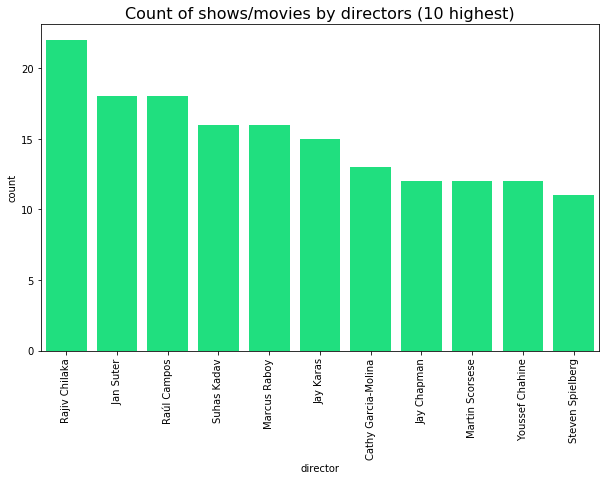

In [78]:
# Now, for the director attribute-

temp = df_consolidated.loc[:,['show_id', 'director']].groupby(['show_id', 'director']).groups.keys()
temp = list(map(lambda x: list(x), temp))
unique_sh_di = pd.DataFrame(temp, columns = ['show_id', 'director'])
unique_sh_di = unique_sh_di.groupby('director')['show_id'].agg(count = ('show_id', 'count')).sort_values(['count'],ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x = unique_sh_di.loc[1:11,'director'], y=unique_sh_di.loc[1:11,'count'], color = 'springgreen')
plt.xticks(rotation=90)
plt.title('Count of shows/movies by directors (10 highest)',fontsize=16)
plt.show()

Rajiv Chilaka, Jan Suter and Raul Campos are some directors with maximum number of movies/shows on the platform.

In [79]:
# Now, for cast attribute-

In [80]:
temp = df_consolidated.loc[:,['show_id', 'cast']].groupby(['show_id', 'cast']).groups.keys()
temp = list(map(lambda x: list(x), temp))
unique_sh_ca = pd.DataFrame(temp, columns = ['show_id', 'cast'])
unique_sh_ca = unique_sh_ca.groupby('cast')['show_id'].agg(count = ('show_id', 'count')).sort_values(['count'],ascending=False).reset_index()
unique_sh_ca.head()

,cast,count
0,nan,825
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28


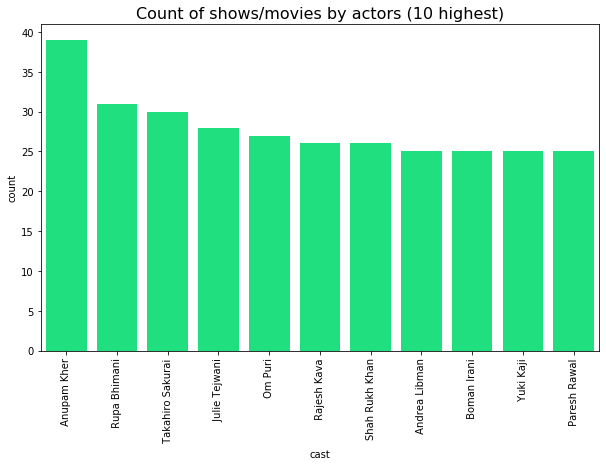

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x = unique_sh_ca.loc[1:11,'cast'], y=unique_sh_ca.loc[1:11,'count'], color = 'springgreen')
plt.xticks(rotation=90)
plt.title('Count of shows/movies by actors (10 highest)',fontsize=16)
plt.show()

Anupam Kher, Rupa Bhimani and Takahiro Sakurai are some actors with maximum movies / shows on the platform.

In [82]:
# For country attribute-

In [83]:
temp = df_consolidated.loc[:,['show_id', 'country']].groupby(['show_id', 'country']).groups.keys()
temp = list(map(lambda x: list(x), temp))
unique_sh_co = pd.DataFrame(temp, columns = ['show_id', 'country'])
unique_sh_co = unique_sh_co.groupby('country')['show_id'].agg(count = ('show_id', 'count')).sort_values(['count'],ascending=False).reset_index()
unique_sh_co.head()

,country,count
0,United States,3211
1,India,1008
2,nan,831
3,United Kingdom,628
4,United States,479


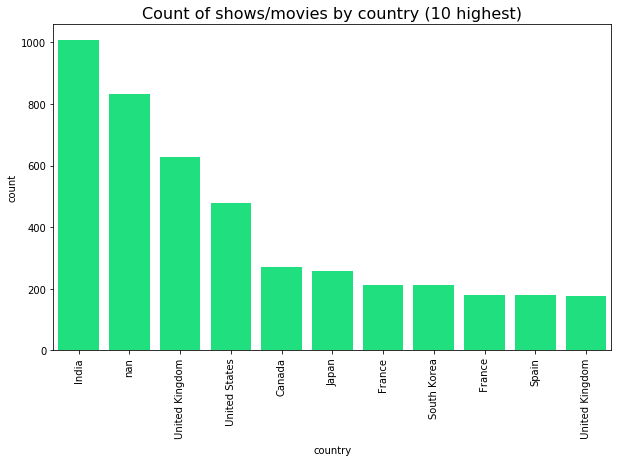

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x = unique_sh_co.loc[1:11,'country'], y=unique_sh_co.loc[1:11,'count'], color = 'springgreen')
plt.xticks(rotation=90)
plt.title('Count of shows/movies by country (10 highest)',fontsize=16)
plt.show()

The platform has the most number of movies/shows from India, followed by UK and USA.

In [85]:
df['duration'] = df['duration'].astype('str')
temp = df['duration'].apply(lambda x: x.split(' '))
num_duration = pd.DataFrame(temp.to_list(), columns=['number', 'string'])

In [86]:
num_dur = num_duration['number']
num_dur.head()

0    90
1     2
2     1
3     1
4     2
Name: number, dtype: object

In [87]:
num_duration['string'].value_counts()
# To check the units used in the duration column

min        6128
Season     1793
Seasons     883
Name: string, dtype: int64

In [88]:
df['num_dur'] = num_dur.astype('float')

In [89]:
movies = df.loc[df['type']=='Movie', 'num_dur']
movies

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: num_dur, Length: 6131, dtype: float64

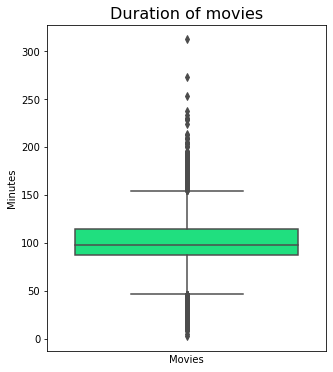

In [90]:
plt.figure(figsize=(5,6))
sns.boxplot(data = movies, color='springgreen')
plt.title('Duration of movies', fontsize = 16)
plt.ylabel('Minutes')
plt.xlabel('Movies')
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

The median duration of movies is around 100 minutes.

In [91]:
tv_shows = df.loc[df['type']=='TV Show', 'num_dur']
tv_shows = tv_shows.reset_index(drop=True)

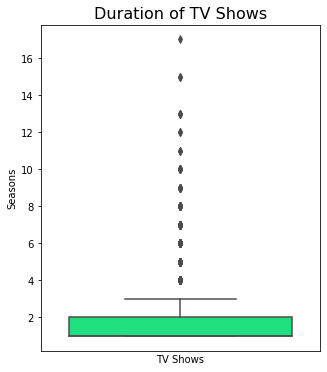

In [92]:
plt.figure(figsize=(5,6))
sns.boxplot(data = tv_shows, color='springgreen')
plt.title('Duration of TV Shows', fontsize = 16)
plt.ylabel('Seasons')
plt.xlabel('TV Shows')
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

The median duration of a TV show is one season.

In [93]:
df_consolidated.head()

,show_id,cast,director,country,listed_in,type,title,date_added,release_year,rating,duration,description
0,s1,nan,Kirsten Johnson,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,Ama Qamata,nan,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s2,Ama Qamata,nan,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,s2,Ama Qamata,nan,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,s2,Khosi Ngema,nan,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [94]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_dur
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0


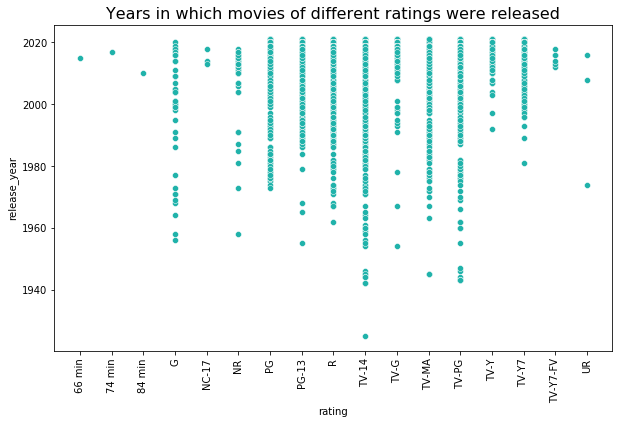

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['rating'], y=df['release_year'], color='lightseagreen')
plt.title('Years in which movies of different ratings were released', fontsize=16)
plt.xticks(rotation=90)
plt.show()

The movies/shows with rating TV-Y7-FV (for more than 7 years old with fantasy violence) were released only after year 2010. Same with NC-17 (not suitable for less than 17 years old).

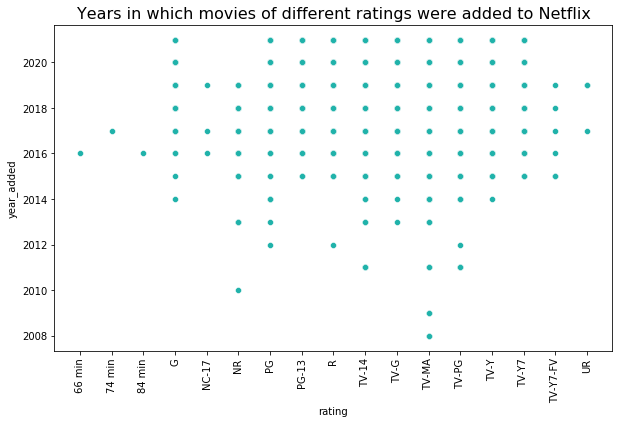

In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['rating'], y=df['date_added'].dt.year, color='lightseagreen')
plt.title('Years in which movies of different ratings were added to Netflix', fontsize=16)
plt.ylabel('year_added')
plt.xticks(rotation=90)
plt.show()

The most recently introduced category is UR (Unrated). The oldest category is TV-MA (mature audiences).

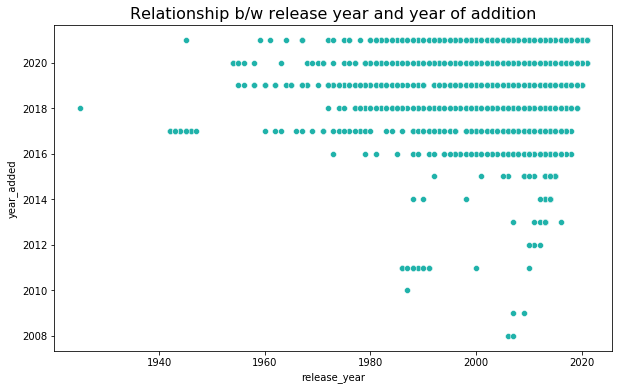

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['release_year'], y=df['date_added'].dt.year, color='lightseagreen')
plt.title('Relationship b/w release year and year of addition', fontsize=16)
plt.ylabel('year_added')
plt.show()

Between the years 2008-2014, only movies/shows released after 1980 had been added. But after 2014, older movies/ shows were also included.

In [98]:
df_consolidated = df_consolidated.merge(df[['show_id', 'num_dur']], on='show_id', how='left')

In [99]:
temp_hm = df_consolidated.loc[df_consolidated['type'] == 'Movie' ,['rating', 'listed_in', 'num_dur']]
temp_hm = temp_hm.groupby(['rating','listed_in'])['num_dur'].agg(duration = ('num_dur', 'mean')).dropna().reset_index()
temp_hm.head()

,rating,listed_in,duration
0,G,Action & Adventure,98.000000
1,G,Children & Family Movies,88.163212
2,G,Classic Movies,123.944444
3,G,Comedies,92.387500
4,G,Documentaries,86.940000


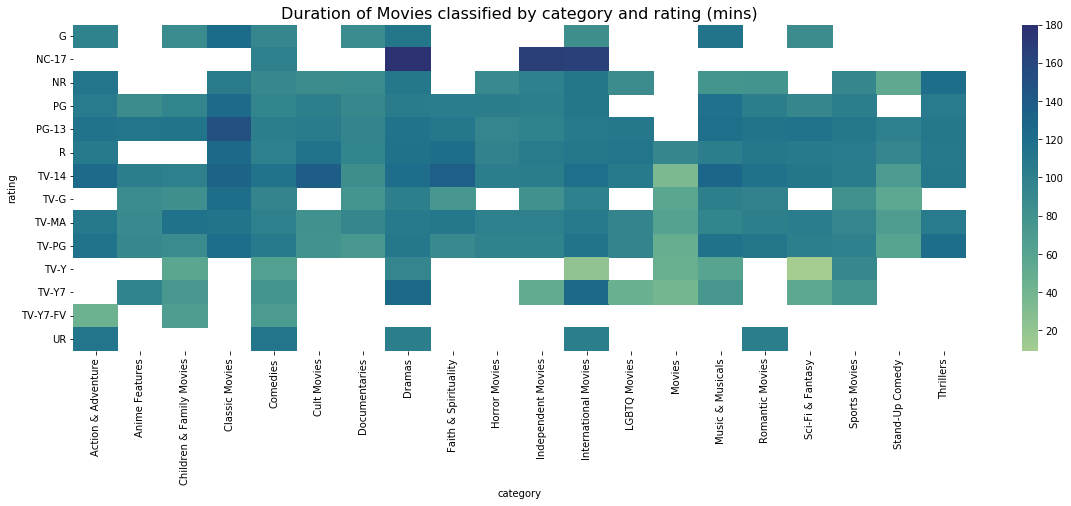

In [100]:
temp_hm = temp_hm.pivot(index='rating', columns = 'listed_in', values = 'duration')
plt.figure(figsize=(20,6))
sns.heatmap(data = temp_hm, annot = False, cmap='crest')
plt.title('Duration of Movies classified by category and rating (mins)', fontsize=16)
plt.xlabel('category')
plt.show()

Movies in category 'Dramas' and rated 'NC-17' are of long duration (close to 180 minutes). Same with Independent Movies rated 'NC-17'. Movies of category Sci-Fi & Fantasy rated 'TV-Y' have one of the shortest durations.

In [101]:
temp_hm = df_consolidated.loc[df_consolidated['type'] == 'TV Show' ,['rating', 'listed_in', 'num_dur']]
temp_hm = temp_hm.groupby(['rating','listed_in'])['num_dur'].agg(duration = ('num_dur', 'mean')).dropna().reset_index()
temp_hm.head()

,rating,listed_in,duration
0,NR,British TV Shows,1.000000
1,NR,Crime TV Shows,1.000000
2,NR,Docuseries,1.000000
3,NR,International TV Shows,1.903226
4,NR,Romantic TV Shows,2.166667


In [102]:
temp_hm = temp_hm.pivot(index='rating', columns = 'listed_in', values = 'duration')

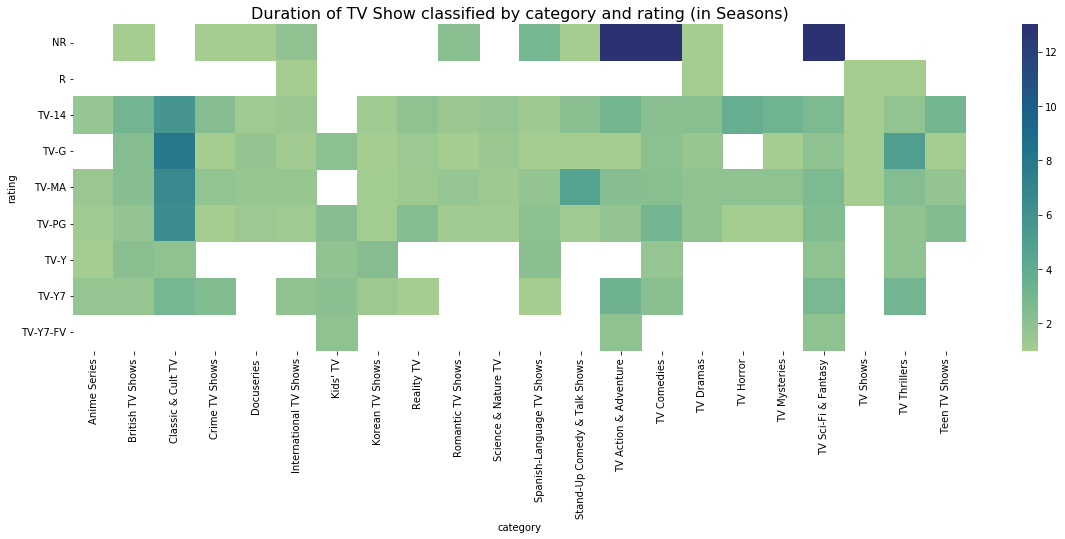

In [103]:
plt.figure(figsize=(20,6))
sns.heatmap(data = temp_hm, annot = False, cmap='crest')
plt.title('Duration of TV Show classified by category and rating (in Seasons)', fontsize=16)
plt.xlabel('category')
plt.show()

Unrated TV Shows under the categories TV Action and Adventure, TV Sci-Fi & Fantasy and TV Comedies have a lot of seasons.

## Insights and recommendations-

Insights - 
1. Bases on our analysis of durations of Movies and TV Shows, it seems that Netflix users prefer movies which are less than 150 minutes long and TV Shows with less than 3 seasons.
2. Bases on the count of movies and tv shows available in each category, it appears that users are interested in multiple genres/categories. International movies is the most popular category.
3. Based on the release year of the movies/shows, we can say that users prefer watching new shows/movies over old ones. However exceptions are also there.

Recommendations-
1. Keep adding new movies/tv shows as they are released. Older movies/tv shows which are less popular can be removed.